In [1]:
#%matplotlib inline

# Import all the programs we want to use. If this gives an error, then you need to add these to your python path.

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
#import holopy as hp
import os
#import av
import scipy
import scipy.optimize as sco
import seaborn

from matplotlib.backends.backend_pdf import PdfPages

%pylab inline 
# tell python how to display images

#%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
scaling =  0.08431 #um/pixel
mpp = scaling
fps = 11.935
moviename = 'tracer+janus_3%_H2O2_5(red)2016-06-14'

In [3]:
os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\analysis')

In [4]:
t1 = pd.read_pickle('filtered_data_tracer+janus_3%_H2O2_5(red)2016-06-14_pickled.pkl')

In [5]:
tm = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_3%_H2O2_5(red)2016-06-14_pickled.pkl')

In [6]:
fpscontrol = 11.959
t1control = pd.read_pickle('filtered_data_tracer+janus_no_H2O2_3(green)2016-06-14_pickled.pkl')

In [7]:
tmcontrolfilename = 'filtered_data_with_drift_subtracted_tracer+janus_no_H2O2_3(green)2016-06-14_pickled.pkl'
tmcontrol = pd.read_pickle(tmcontrolfilename)

controlmoviename = 'tracer+janus_no_H2O2_3(green)2016-06-14'

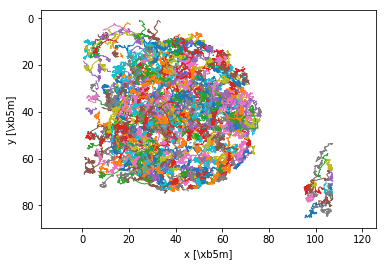

In [8]:
plt.axis('equal')
ax = tp.plot_traj(t1, mpp = scaling, legend=False)

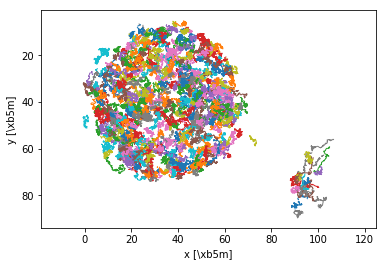

In [9]:
plt.axis('equal')
ax = tp.plot_traj(tm, mpp = scaling, legend=False)

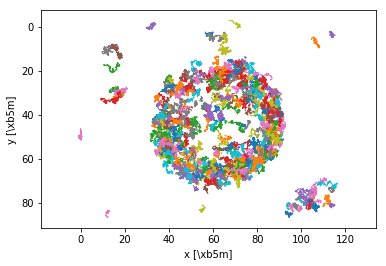

In [10]:
plt.axis('equal')
ax = tp.plot_traj(tmcontrol, mpp = scaling, legend=False)

C:\ProgramData\Anaconda2\lib\site-packages\trackpy\motion.py:270: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=0,window=15,center=False).mean()
  dx = pd.rolling_mean(dx, smoothing, min_periods=0)


Text(0.5,1,u'Translational drift in tracer+janus_3%_H2O2_5(red)2016-06-14\n')

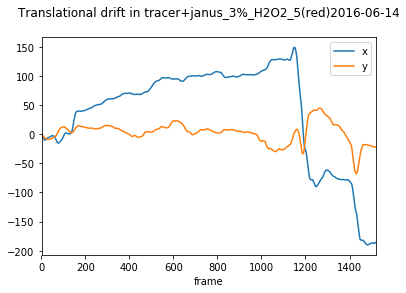

In [11]:
d = tp.compute_drift(t1, smoothing=15)

#plt.figure()
d.plot(grid=False)
plt.title('Translational drift in ' + moviename + '\n')

In [12]:
tracks = t1['particle'].astype(int).unique()

In [13]:
t1.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,536.142158,135.159496,2952.132081,4.611667,0.064877,26.261924,19676.0,0.064763,0,3.0
1,529.171947,140.293532,1887.428114,4.359759,0.070215,19.877175,17782.0,0.086047,1,3.0
2,527.361802,139.542492,1917.793420,4.371425,0.017234,21.242330,17764.0,0.084447,2,3.0
3,525.321703,139.632476,1601.409461,4.488760,0.025374,16.745614,17266.0,0.091821,3,3.0
4,532.845546,147.620820,1704.856219,4.456315,0.051614,17.289379,16890.0,0.100730,4,3.0


In [14]:
## Filter out trajectories that have imsd 0.0.

list_of_long_trajectories = []
list_of_short_trajectories = []

for i in range(size(tracks)):
    max_x = max(tm[tm['particle']==tracks[i]].x)
    min_x = min(tm[tm['particle']==tracks[i]].x)
    max_y = max(tm[tm['particle']==tracks[i]].y)
    min_y = min(tm[tm['particle']==tracks[i]].y)
    
    if isnan(max_x):
        list_of_short_trajectories.append(tracks[i])
    else:
        if isnan(max_y):
            list_of_short_trajectories.append(tracks[i])
        else:
            list_of_long_trajectories.append(tracks[i])
        
# remove each of the undesired trajectories
tm_extended = tm.copy()
for i in list_of_short_trajectories:
    tm_extended = tm_extended[tm_extended.particle != i]

print list_of_short_trajectories    

[4468, 4489, 4497, 4501, 4512, 4513, 4517, 4521, 4528, 4531, 4536, 4540, 4556, 4557, 4558, 4560, 4563, 4567, 4569, 4578, 4582, 4600, 4608, 4617, 4619, 4621, 4624, 4625, 4628, 4629, 4631, 4632, 4641, 4649, 4659, 4671, 4673, 4684, 4685, 4691, 4701, 4702, 4703, 4704, 4710, 4712, 4726, 4729, 4751, 4755, 4756, 4758, 4774, 4776, 4779, 4780, 4809, 4810, 4830, 4853, 4858, 4864, 4881, 4892, 4901, 4907, 4912, 4916, 4919, 4921, 4953, 4954, 4970, 4979, 4990, 5006, 5008, 5027, 5037, 5050, 5053, 5058, 5078, 5088, 5092, 5105, 5106, 5117, 5121, 5137, 5143, 5188, 5197, 5203, 5227, 5230, 5233, 5235, 5257, 5259, 5262, 5269, 5276, 5290, 5294, 5297]


In [15]:
tm = tm_extended

In [16]:
imsd_not_subtracted = tp.imsd(t1, scaling, fps, max_lagtime=1000)

In [17]:
imsd_subtracted = tp.imsd(tm, scaling, fps, max_lagtime=1000)

In [18]:
imsd_sub_control = tp.imsd(tmcontrol, scaling, fpscontrol, max_lagtime=1000)

In [19]:
emsd_not_subtracted = tp.emsd(t1, scaling, fps,max_lagtime=1000)

In [20]:
emsd_subtracted = tp.emsd(tm, scaling, fps,max_lagtime=90)

In [21]:
emsd_sub_control = tp.emsd(tmcontrol, scaling, fpscontrol,max_lagtime=90)

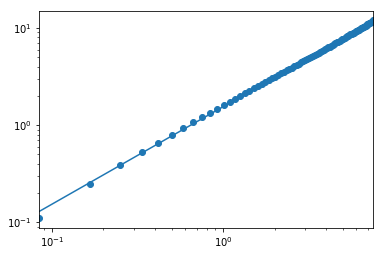

,n,A
msd,1.004421,1.549995


In [22]:
res = tp.utils.fit_powerlaw(emsd_subtracted)  # performs linear best fit in log space, plots
res

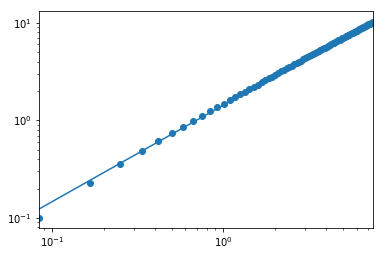

,n,A
msd,0.989395,1.4335


In [23]:
rescontrol = tp.utils.fit_powerlaw(emsd_sub_control)  # performs linear best fit in log space, plots
rescontrol

t0 = frange(.083787,5.027231,.1)
fit = res.A[0]*(t0**res.n[0])
fitcontrol = rescontrol.A[0]*(t0**rescontrol.n[0])

tracer+janus_no_H2O2_3(red)2016-06-14
Coefficient A = 1.52097219425 ± 0.0586905807148
Exponent n = 1.01256758845 ± 0.0274775775088

In [24]:
## copy fitting parameters from other notebook (MSD_standard_deviation-tracer+janus_3%_H2O2_5(red)2016-06-1):
A = 1.54530710341
n = 1.01828336429
t0 = frange(.083787,5.027231,.1)
fit = A*(t0**n)
Acontrol = 1.52097219425
ncontrol = 1.01256758845
fitcontrol = Acontrol*(t0**ncontrol)

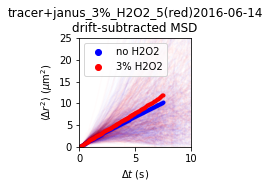

In [25]:
fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'r-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H2O2")  # dark
plot(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'r.', alpha=1, label="3% H2O2")  # dark
plot(t0,fit, 'r', alpha = 1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')

plt.ylim(0,25)
plt.xlim(0,10)
#fig.set_size_inches(5,3)
fig.set_size_inches(2,2)
plt.title(moviename + '\ndrift-subtracted MSD')
plt.legend(frameon=True,  markerscale= 2)

os.chdir('../analysis/')

pp = PdfPages('imsd_and_emsd_with_fits' + moviename + ',linear.pdf')
#plt.tight_layout()
pp.savefig(fig, bbox_inches='tight')
pp.close()

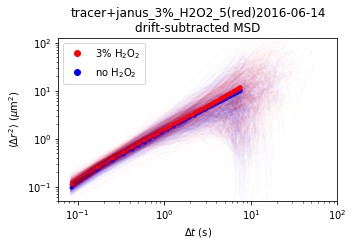

In [26]:
fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'r-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H$_2$O$_2$")  # dark
loglog(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'r.', alpha=1, label="3% H$_2$O$_2$")  # dark
loglog(t0,fit, 'r', alpha =1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(.05,125)
plt.xlim(.06,100)
fig.set_size_inches(5,3)
#fig.set_size_inches(10,10)
plt.title(moviename + '\ndrift-subtracted MSD')
plt.legend(frameon=True,  markerscale= 2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],frameon=True,  markerscale= 2)

tracer+janus_3%_H2O2_5(red)2016-06-14
drift-subtracted MSD
pdf saved


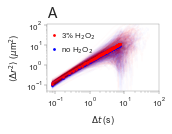

In [27]:
import seaborn as sns
sns.set(style='ticks')
sns.set_context('paper')


plt.rcParams.update({'legend.handlelength': 0})
plt.rcParams.update({'axes.titlesize' : 14 })
plt.rcParams.update({'xtick.major.size': 3 ,
                     'ytick.major.size': 3,
                     'axes.linewidth' : .2,
                     'xtick.minor.size': 1.5 ,
                     'ytick.minor.size': 1.5})

fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'r-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H$_2$O$_2$")  # dark
loglog(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'r.', alpha=1, label="3% H$_2$O$_2$")  # dark
loglog(t0,fit, 'r', alpha =1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(.05,125)
plt.xlim(.06,100)

thisheight=2/1.618
thiswidth=2
fig.set_size_inches(thiswidth,thisheight)
#fig.set_size_inches(10,10)

print(moviename + '\ndrift-subtracted MSD')
plt.title('A', loc='left')

ax.tick_params(width=.3, which='major', pad=2)
ax.tick_params(width=.18, which='minor')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],frameon=False)

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('6Aimsd_and_emsd_with_fits,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    plt.savefig('6Aimsd_and_emsd_with_fits,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('6Aimsd_and_emsd_with_fits,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

In [28]:
res

,n,A
msd,1.004421,1.549995


In [29]:
rescontrol

,n,A
msd,0.989395,1.4335


In [30]:
A

1.54530710341

In [31]:
n

1.01828336429

In [32]:
Acontrol

1.52097219425

In [33]:
ncontrol

1.01256758845